<a href="https://colab.research.google.com/github/MOWENS117/MOWENS117.github.io/blob/main/spotify/spotify_scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**World Spotify Data Analysis**

The goal of this mini-project is to investigate how Spotify prices vary globally. In my LSE course on Globalization and Economic Policy (PP418), we discussed the principle that, in the absence of transport costs, product differentiation, and other frictions, prices should converge—a concept known as the law of one price. One might initially assume that digital products, which have minimal delivery frictions, would exhibit similar prices globally. However, the opposite appears to be true. This project aims to explore this puzzle further.

**Findings**

My investigation revealed substantial variation in Spotify prices across countries. The focus of the analysis was the price of an individual Spotify subscription. Key statistics include:



*   Mean monthly price: \$5.67 USD
*   Standard deviation: \$3.14 USD
*   Price range: \$0.84 to \$15.40 USD


Interestingly, there was a strong correlation between Spotify prices and GDP per capita, supporting a price discrimination narrative where Spotify tailors prices to each country's willingness to pay. A regression of Spotify price on GDP per capita found a statistically significant relationship at a confidence level exceeding 99%.

The results showed:


* T-value: 12.88
* P-value: 2e-16
* Effect size: For every $1 increase in GDP per capita, the Spotify price increased by \$0.00007406 USD.

When region-specific dummy variables were added to the model, similar results were observed. Full regression results are presented below.

                ──────────────────────────────────────────────────────────────
                                                     (1)            (2)       
                                               ───────────────────────────────
                  (Intercept)                       4.205 ***      2.845 ***  
                                                   (0.202)        (0.254)     
                  GDP.per.capita..current.US..      0.000 ***      0.000 ***  
                                                   (0.000)        (0.000)     
                  RegionAsia                                       0.831 *    
                                                                  (0.396)     
                  RegionEurope                                     3.618 ***  
                                                                  (0.428)     
                  RegionNorth America                              2.339 ***  
                                                                  (0.409)     
                  RegionOceania                                    3.529 ***  
                                                                  (0.557)     
                                               ───────────────────────────────
                  N                               174            174          
                  R2                                0.491          0.682      
                  logLik                         -384.661       -343.688      
                  AIC                             775.322        701.375      
                ──────────────────────────────────────────────────────────────
                  *** p < 0.001; ** p < 0.01; * p < 0.05.                     

**Theories**
While these findings do not necessarily disprove the law of one price, several factors may explain the observed price differences:

* Price discrimination: Spotify appears to adjust prices based on each country’s willingness to pay.
* Product differentiation: The Spotify song catalogue may vary significantly between countries and regions, meaning the product being sold is not entirely uniform.
* Market competition: The degree of competition in music streaming services may differ across regions, influencing Spotify's pricing strategy.


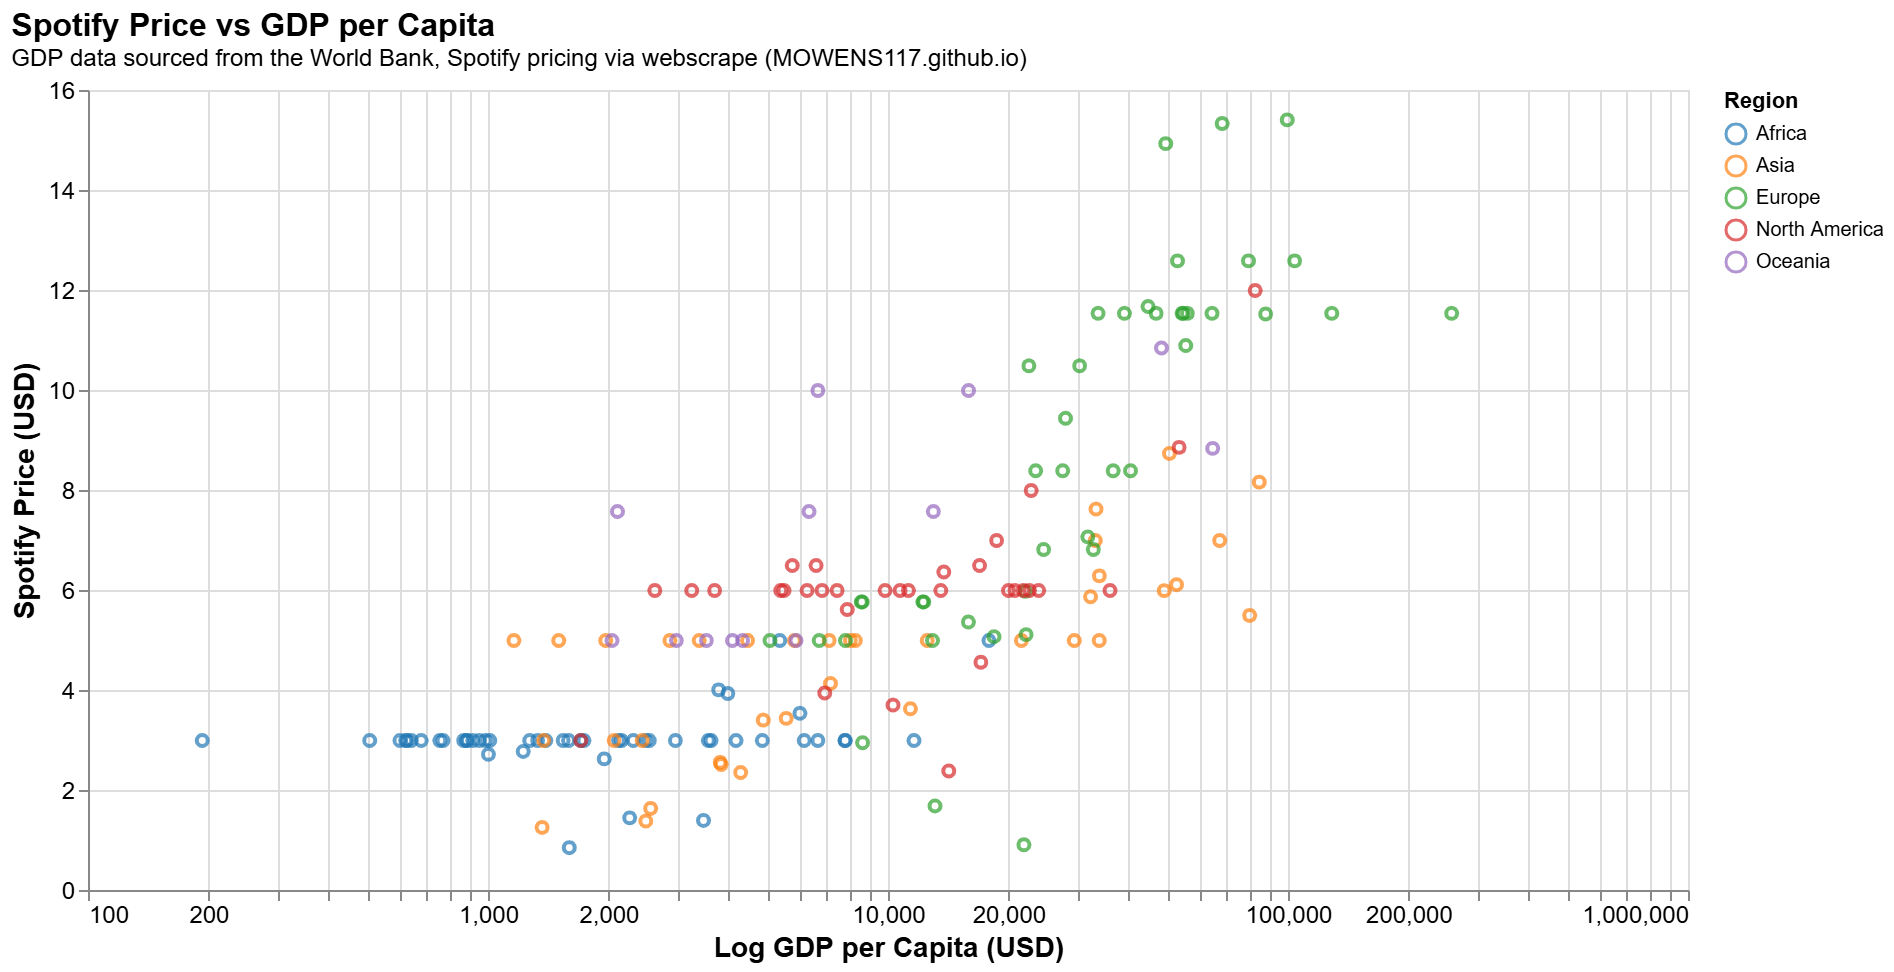



**Code**

I’m neither a programmer nor a data scientist, so I’m not claiming this is the most efficient method, but here’s how I acquired the data. I ran a loop to scrape each Spotify pricing plan page and used the Beautiful Soup package to extract the HTML containing the price for individual plans. From there, I cleaned the extracted data to retain only numeric values.

Unfortunately, a significant amount of manual cleaning was required afterward. First, some of the scraping failed, particularly for languages that did not use Latin characters. Second, I had to manually check which countries priced their plans in USD, EUR, or AUD rather than the local currency. Lastly, some countries, such as India, priced Spotify subscriptions for a minimum of two months, which required adjustments.

After addressing these issues, I had a dataset with Spotify prices in various currency units.

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

countries = [
    # Africa
    {"country": "Algeria", "iso_code": "DZ"},
    {"country": "Angola", "iso_code": "AO"},
    {"country": "Benin", "iso_code": "BJ"},
    {"country": "Botswana", "iso_code": "BW"},
    {"country": "Burkina Faso", "iso_code": "BF"},
    {"country": "Burundi", "iso_code": "BI"},
    {"country": "Cameroon", "iso_code": "CM"},
    {"country": "Cape Verde", "iso_code": "CV"},
    {"country": "Chad", "iso_code": "TD"},
    {"country": "Comoros", "iso_code": "KM"},
    {"country": "Côte d'Ivoire", "iso_code": "CI"},
    {"country": "Democratic Republic of the Congo", "iso_code": "CD"},
    {"country": "Djibouti", "iso_code": "DJ"},
    {"country": "Egypt", "iso_code": "EG"},
    {"country": "Ethiopia", "iso_code": "ET"},
    {"country": "Equatorial Guinea", "iso_code": "GQ"},
    {"country": "Eswatini", "iso_code": "SZ"},
    {"country": "Gabon", "iso_code": "GA"},
    {"country": "Gambia", "iso_code": "GM"},
    {"country": "Ghana", "iso_code": "GH"},
    {"country": "Guinea", "iso_code": "GN"},
    {"country": "Guinea-Bissau", "iso_code": "GW"},
    {"country": "Kenya", "iso_code": "KE"},
    {"country": "Lesotho", "iso_code": "LS"},
    {"country": "Liberia", "iso_code": "LR"},
    {"country": "Libya", "iso_code": "LY"},
    {"country": "Madagascar", "iso_code": "MG"},
    {"country": "Malawi", "iso_code": "MW"},
    {"country": "Mali", "iso_code": "ML"},
    {"country": "Mauritania", "iso_code": "MR"},
    {"country": "Mauritius", "iso_code": "MU"},
    {"country": "Morocco", "iso_code": "MA"},
    {"country": "Mozambique", "iso_code": "MZ"},
    {"country": "Namibia", "iso_code": "NA"},
    {"country": "Niger", "iso_code": "NE"},
    {"country": "Nigeria", "iso_code": "NG"},
    {"country": "Republic of the Congo", "iso_code": "CG"},
    {"country": "Rwanda", "iso_code": "RW"},
    {"country": "São Tomé and Príncipe", "iso_code": "ST"},
    {"country": "Senegal", "iso_code": "SN"},
    {"country": "Seychelles", "iso_code": "SC"},
    {"country": "Sierra Leone", "iso_code": "SL"},
    {"country": "South Africa", "iso_code": "ZA"},
    {"country": "Tanzania", "iso_code": "TZ"},
    {"country": "Togo", "iso_code": "TG"},
    {"country": "Tunisia", "iso_code": "TN"},
    {"country": "Uganda", "iso_code": "UG"},
    {"country": "Zambia", "iso_code": "ZM"},
    {"country": "Zimbabwe", "iso_code": "ZW"},

    # Asia
    {"country": "Armenia", "iso_code": "AM"},
    {"country": "Azerbaijan", "iso_code": "AZ"},
    {"country": "Bahrain", "iso_code": "BH"},
    {"country": "Bangladesh", "iso_code": "BD"},
    {"country": "Bhutan", "iso_code": "BT"},
    {"country": "Brunei Darussalam", "iso_code": "BN"},
    {"country": "Cambodia", "iso_code": "KH"},
    {"country": "Georgia", "iso_code": "GE"},
    {"country": "Hong Kong", "iso_code": "HK"},
    {"country": "India", "iso_code": "IN"},
    {"country": "Indonesia", "iso_code": "ID"},
    {"country": "Iraq", "iso_code": "IQ"},
    {"country": "Israel", "iso_code": "IL"},
    {"country": "Japan", "iso_code": "JP"},
    {"country": "Jordan", "iso_code": "JO"},
    {"country": "Kuwait", "iso_code": "KW"},
    {"country": "Kyrgyzstan", "iso_code": "KG"},
    {"country": "Lao People's Democratic Republic", "iso_code": "LA"},
    {"country": "Lebanon", "iso_code": "LB"},
    {"country": "Macao", "iso_code": "MO"},
    {"country": "Malaysia", "iso_code": "MY"},
    {"country": "Maldives", "iso_code": "MV"},
    {"country": "Mongolia", "iso_code": "MN"},
    {"country": "Nepal", "iso_code": "NP"},
    {"country": "Oman", "iso_code": "OM"},
    {"country": "Pakistan", "iso_code": "PK"},
    {"country": "Palestine", "iso_code": "PS"},
    {"country": "Philippines", "iso_code": "PH"},
    {"country": "Qatar", "iso_code": "QA"},
    {"country": "Saudi Arabia", "iso_code": "SA"},
    {"country": "Singapore", "iso_code": "SG"},
    {"country": "South Korea", "iso_code": "KR"},
    {"country": "Sri Lanka", "iso_code": "LK"},
    {"country": "Taiwan", "iso_code": "TW"},
    {"country": "Tajikistan", "iso_code": "TJ"},
    {"country": "Thailand", "iso_code": "TH"},
    {"country": "Timor-Leste", "iso_code": "TL"},
    {"country": "United Arab Emirates", "iso_code": "AE"},
    {"country": "Uzbekistan", "iso_code": "UZ"},
    {"country": "Vietnam", "iso_code": "VN"},

    # Europe
    {"country": "Albania", "iso_code": "AL"},
    {"country": "Andorra", "iso_code": "AD"},
    {"country": "Austria", "iso_code": "AT"},
    {"country": "Belarus", "iso_code": "BY"},
    {"country": "Belgium", "iso_code": "BE"},
    {"country": "Bosnia and Herzegovina", "iso_code": "BA"},
    {"country": "Bulgaria", "iso_code": "BG"},
    {"country": "Croatia", "iso_code": "HR"},
    {"country": "Cyprus", "iso_code": "CY"},
    {"country": "Czech Republic", "iso_code": "CZ"},
    {"country": "Denmark", "iso_code": "DK"},
    {"country": "Estonia", "iso_code": "EE"},
    {"country": "Finland", "iso_code": "FI"},
    {"country": "France", "iso_code": "FR"},
    {"country": "Germany", "iso_code": "DE"},
    {"country": "Greece", "iso_code": "GR"},
    {"country": "Hungary", "iso_code": "HU"},
    {"country": "Iceland", "iso_code": "IS"},
    {"country": "Ireland", "iso_code": "IE"},
    {"country": "Italy", "iso_code": "IT"},
    {"country": "Kazakhstan", "iso_code": "KZ"},
    {"country": "Latvia", "iso_code": "LV"},
    {"country": "Liechtenstein", "iso_code": "LI"},
    {"country": "Lithuania", "iso_code": "LT"},
    {"country": "Luxembourg", "iso_code": "LU"},
    {"country": "Malta", "iso_code": "MT"},
    {"country": "Moldova", "iso_code": "MD"},
    {"country": "Monaco", "iso_code": "MC"},
    {"country": "Montenegro", "iso_code": "ME"},
    {"country": "Netherlands", "iso_code": "NL"},
    {"country": "North Macedonia", "iso_code": "MK"},
    {"country": "Norway", "iso_code": "NO"},
    {"country": "Poland", "iso_code": "PL"},
    {"country": "Portugal", "iso_code": "PT"},
    {"country": "Romania", "iso_code": "RO"},
    {"country": "Serbia", "iso_code": "RS"},
    {"country": "Slovakia", "iso_code": "SK"},
    {"country": "Slovenia", "iso_code": "SI"},
    {"country": "Spain", "iso_code": "ES"},
    {"country": "Sweden", "iso_code": "SE"},
    {"country": "Switzerland", "iso_code": "CH"},
    {"country": "Turkey", "iso_code": "TR"},
    {"country": "Ukraine", "iso_code": "UA"},
    {"country": "United Kingdom", "iso_code": "GB"},

    # North America
    {"country": "Antigua and Barbuda", "iso_code": "AG"},
    {"country": "Bahamas", "iso_code": "BS"},
    {"country": "Barbados", "iso_code": "BB"},
    {"country": "Belize", "iso_code": "BZ"},
    {"country": "Canada", "iso_code": "CA"},
    {"country": "Costa Rica", "iso_code": "CR"},
    {"country": "Dominica", "iso_code": "DM"},
    {"country": "Dominican Republic", "iso_code": "DO"},
    {"country": "El Salvador", "iso_code": "SV"},
    {"country": "Grenada", "iso_code": "GD"},
    {"country": "Guatemala", "iso_code": "GT"},
    {"country": "Haiti", "iso_code": "HT"},
    {"country": "Honduras", "iso_code": "HN"},
    {"country": "Jamaica", "iso_code": "JM"},
    {"country": "Mexico", "iso_code": "MX"},
    {"country": "Nicaragua", "iso_code": "NI"},
    {"country": "Panama", "iso_code": "PA"},
    {"country": "Saint Kitts and Nevis", "iso_code": "KN"},
    {"country": "Saint Lucia", "iso_code": "LC"},
    {"country": "Saint Vincent and the Grenadines", "iso_code": "VC"},
    {"country": "Trinidad and Tobago", "iso_code": "TT"},
    {"country": "United States", "iso_code": "US"},

    # South America
    {"country": "Argentina", "iso_code": "AR"},
    {"country": "Bolivia", "iso_code": "BO"},
    {"country": "Brazil", "iso_code": "BR"},
    {"country": "Chile", "iso_code": "CL"},
    {"country": "Colombia", "iso_code": "CO"},
    {"country": "Ecuador", "iso_code": "EC"},
    {"country": "Guyana", "iso_code": "GY"},
    {"country": "Paraguay", "iso_code": "PY"},
    {"country": "Peru", "iso_code": "PE"},
    {"country": "Suriname", "iso_code": "SR"},
    {"country": "Uruguay", "iso_code": "UY"},
    {"country": "Venezuela", "iso_code": "VE"},

    # Oceania
    {"country": "Australia", "iso_code": "AU"},
    {"country": "Fiji", "iso_code": "FJ"},
    {"country": "Kiribati", "iso_code": "KI"},
    {"country": "Marshall Islands", "iso_code": "MH"},
    {"country": "Micronesia", "iso_code": "FM"},
    {"country": "Nauru", "iso_code": "NR"},
    {"country": "New Zealand", "iso_code": "NZ"},
    {"country": "Palau", "iso_code": "PW"},
    {"country": "Papua New Guinea", "iso_code": "PG"},
    {"country": "Samoa", "iso_code": "WS"},
    {"country": "Solomon Islands", "iso_code": "SB"},
    {"country": "Tonga", "iso_code": "TO"},
    {"country": "Tuvalu", "iso_code": "TV"},
    {"country": "Vanuatu", "iso_code": "VU"}
]

base_url = "https://www.spotify.com/{iso_code}/premium/#plans"

def scrape_pricing(url):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, "html.parser")

        price_element = soup.find("p", class_="sc-71cce616-6 fQVkUv")
        if not price_element:
            return "Pricing not found in HTML"

        raw_price_text = price_element.get_text(strip=True)

        # Extract only numeric values, ignoring currency symbols and other characters
        match = re.search(r"\d+(?:[\.,]\d+)*", raw_price_text)
        if match:
            # Remove commas and dots for consistency, then convert to float format
            numeric_price = match.group(0).replace(",", "").replace(".", "")
            return numeric_price
        else:
            return "N/A"
    except Exception as e:
        return f"An error occurred: {str(e)}"

results = []
for country in countries:
    iso_code = country["iso_code"].lower()
    url = base_url.format(iso_code=iso_code)
    print(f"Scraping {country['country']} ({iso_code}): {url}")
    pricing = scrape_pricing(url)
    results.append({
        "Country": country["country"],
        "ISO Code": iso_code.upper(),
        "Pricing": pricing
    })

df = pd.DataFrame(results)

# Ensure the 'Pricing' column only contains numeric values
df["Pricing"] = df["Pricing"].apply(lambda x: re.sub(r"[^\d]", "", x) if isinstance(x, str) else x)

output_file = "spotify_pricing_cleaned.csv"
df.to_csv(output_file, index=False)

print(f"\nResults saved to {output_file}")
print("\nScraped Results:")
print(df)


Scraping Algeria (dz): https://www.spotify.com/dz/premium/#plans
Scraping Angola (ao): https://www.spotify.com/ao/premium/#plans
Scraping Benin (bj): https://www.spotify.com/bj/premium/#plans
Scraping Botswana (bw): https://www.spotify.com/bw/premium/#plans
Scraping Burkina Faso (bf): https://www.spotify.com/bf/premium/#plans
Scraping Burundi (bi): https://www.spotify.com/bi/premium/#plans
Scraping Cameroon (cm): https://www.spotify.com/cm/premium/#plans
Scraping Cape Verde (cv): https://www.spotify.com/cv/premium/#plans
Scraping Chad (td): https://www.spotify.com/td/premium/#plans
Scraping Comoros (km): https://www.spotify.com/km/premium/#plans
Scraping Côte d'Ivoire (ci): https://www.spotify.com/ci/premium/#plans
Scraping Democratic Republic of the Congo (cd): https://www.spotify.com/cd/premium/#plans
Scraping Djibouti (dj): https://www.spotify.com/dj/premium/#plans
Scraping Egypt (eg): https://www.spotify.com/eg/premium/#plans
Scraping Ethiopia (et): https://www.spotify.com/et/premi

**Converting to USD**

After obtaining my dataset, I needed to convert all prices to USD to ensure comparability. First, I identified the currency code for each country, excluding those already in EUR, USD, or AUD. To simplify this step, I used ChatGPT to generate a list of currency codes.

Next, I utilised a free API from ExchangeRate-API, which allowed me to convert prices into USD based on the respective currency codes. The Python code below demonstrates the conversion process.

In [16]:
import pandas as pd
import requests

response = requests.get('https://v6.exchangerate-api.com/v6/26e098c4aabde83f585245b6/latest/USD')
data = response.json()
rates = data['conversion_rates']

df = pd.read_csv('spotify_prices_usd_4.csv')

# Convert Pricing to float
df['Pricing'] = pd.to_numeric(df['Pricing'], errors='coerce')

def convert_to_usd(row):
   if row['Currency'] == 'USD':
       return row['Pricing']
   try:
       return row['Pricing'] / rates[row['Currency']]
   except KeyError:
       print(f"Warning: No rate found for {row['Currency']}")
       return None

df['Price_USD'] = df.apply(convert_to_usd, axis=1)
df.to_csv('spotify_prices_usd_5.csv', index=False)

**Analysis**

Before conducting the final analysis, I needed to combine the price data with GDP per capita data from the World Bank. I used ChatGPT to assist with this step. However, the ISO codes for countries in the two datasets did not align, so I had to match the data based on country names. This required some manual cleaning, as certain country names differed between the datasets.

Once the data was properly merged, the regression analysis was relatively straightforward.

In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

spotify_data = pd.read_csv('Spotify_Prices_Merged_with_GDP_Data__By_Country_Name_.csv')

# Simple regression
gdp_per_capita = spotify_data['GDP per capita (current US$)'].values.reshape(-1, 1)
spotify_prices = spotify_data['Price_USD'].values

valid_data_mask = ~(np.isnan(gdp_per_capita).any(axis=1) | np.isnan(spotify_prices))
gdp_clean = gdp_per_capita[valid_data_mask]
prices_clean = spotify_prices[valid_data_mask]

# GDP only model
X_gdp = sm.add_constant(gdp_clean)
X_gdp = pd.DataFrame(X_gdp, columns=['const', 'GDP_per_capita'])
gdp_only_model = sm.OLS(prices_clean, X_gdp).fit()

print("Simple Regression Results (GDP Only):")
print(gdp_only_model.summary())

# Multiple regression with regions
region_encoder = OneHotEncoder(drop='first')
region_dummy_vars = region_encoder.fit_transform(spotify_data[['Region']]).toarray()
region_variable_names = region_encoder.get_feature_names_out(['Region'])

gdp_and_region_vars = np.column_stack([gdp_per_capita, region_dummy_vars])
gdp_and_region_clean = gdp_and_region_vars[valid_data_mask]

# Create DataFrame with named columns for the full model
X_full = sm.add_constant(gdp_and_region_clean)
X_full = pd.DataFrame(X_full,
                     columns=['const', 'GDP_per_capita'] + list(region_variable_names))

full_model = sm.OLS(prices_clean, X_full).fit()
print("\nMultiple Regression Results (GDP + Regions):")
print(full_model.summary())

Simple Regression Results (GDP Only):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     166.0
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           5.09e-27
Time:                        16:33:54   Log-Likelihood:                -384.66
No. Observations:                 174   AIC:                             773.3
Df Residuals:                     172   BIC:                             779.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const 